In [3]:
import sys
sys.path.append("../")

In [4]:
from circuits.circuits import Separable_rx, IQPLikeCircuit

from squlearn.kernel import ProjectedQuantumKernel, FidelityKernel
from qiskit.primitives import Estimator, Sampler
from squlearn.util import Executor
import numpy as np
from models.manual_kernels import variance_off_diagonal
import matplotlib.pyplot as plt

from data_tools.get_dataset import load_dataset, load_dataset_without_quantum_cache,artificial_dataset
from sklearn.svm import SVR, SVC

#import sns color palette
import seaborn as sns

#from sklearn import rbf and poly kernels
from sklearn.metrics.pairwise import rbf_kernel, polynomial_kernel

squlearn.encoding_circuit.__init__.py running


In [5]:

import seaborn as sns
import matplotlib.pyplot as plt


from matplotlib import rc
rc('text', usetex=True)


sns.set_context("paper", rc={"font.size":14,"axes.titlesize":16,"axes.labelsize":16, 
                             "legend.fontsize":14, "xtick.labelsize":16, 
                             "ytick.labelsize":16, "legend.title_fontsize":14,  'lines.linewidth': 3, 'lines.markersize': 6})


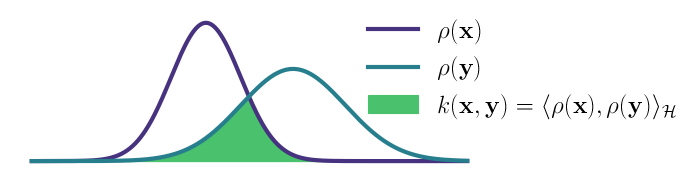

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


# Generate data points

fig, axs = plt.subplots(1, 1, figsize=(7, 2)) #6 ,2
x = np.linspace(-5, 5, 1000)

# Parameters for the two Gaussian distributions
mean1, std1 = -1, 0.8  # Mean and standard deviation for the first Gaussian
mean2, std2 = 1, 1.2  # Mean and standard deviation for the second Gaussian

#create a small gaussian to sum as noise
mean3, std3 = 4, 0.5

gaussian_1_label = r'$\rho(\mathbf{x})$'
gaussian_2_label = r'$\rho(\mathbf{y})$'
inner_product_label = r'$k(\mathbf{x}, \mathbf{y}) = \langle \rho(\mathbf{x}), \rho(\mathbf{y}) \rangle_{\mathcal{H}}$'
# Gaussian distributions
y1 = norm.pdf(x, mean1, std1)
y2 = norm.pdf(x, mean2, std2)  #+ norm.pdf(x, mean2*0, std2*0.3)*0.2

#define color 1 and color 2, light blue and lighter blue
color1 =  sns.color_palette("viridis")[0] #Set2
color2 =  sns.color_palette("viridis")[2]
color3 =  sns.color_palette("viridis")[4]
# Plot the two Gaussians
plt.plot(x, y1, label=gaussian_1_label, color=color1)
plt.plot(x, y2, label=gaussian_2_label, color=color2)

# Find the minimum of the two Gaussians to highlight the overlap
y_overlap = np.minimum(y1, y2)

# Fill the overlapping region
plt.fill_between(x, y_overlap, color=color3, alpha=1, label=inner_product_label)

# Additional plot details
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
#legend more to the right
plt.axis('off')

#legend to the right of the plot#0.55
plt.legend(loc='center left', bbox_to_anchor=(0.70, 0.65), frameon=False, fontsize=18)
#save as svg
#plt.savefig("two_gaussians_overlap_poster.png", bbox_inches='tight', dpi=400)
plt.tight_layout()


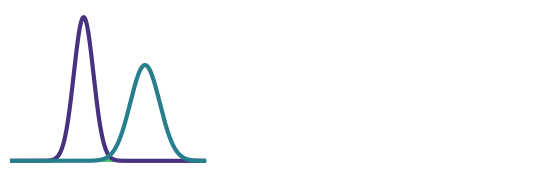

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


# Generate data points

fig, axs = plt.subplots(1, 1, figsize=(5, 2))
x = np.linspace(-8, 8, 1000)

plt.xlim(-8, 8)
# Parameters for the two Gaussian distributions

mean1, std1 = -2, 0.8  # Mean and standard deviation for the first Gaussian
mean2, std2 = 3, 1.2  # Mean and standard deviation for the second Gaussian

#create a small gaussian to sum as noise


# Gaussian distributions
bd = 1
y1 = norm.pdf(x*bd, mean1, std1)
y2 = norm.pdf(x*bd, mean2, std2)  #+ norm.pdf(x, mean2*0, std2*0.3)*0.2


#define color 1 and color 2, light blue and lighter blue
color1 =  sns.color_palette("viridis")[0] #Set2
color2 =  sns.color_palette("viridis")[2]
color3 =  sns.color_palette("viridis")[4]
# Plot the two Gaussians
plt.plot(x, y1, label=r'$|\phi(x_1)\rangle$', color=color1)
plt.plot(x, y2, label=r'$|\phi(x_2)\rangle$', color=color2)

# Find the minimum of the two Gaussians to highlight the overlap
y_overlap = np.minimum(y1, y2)

# Fill the overlapping region
plt.fill_between(x, y_overlap, color=color3, alpha=1, label=r"$k(x_1, x_2) = \langle \phi(x_1), \phi(x_2) \rangle_{\mathcal{H}}$")

# Additional plot details
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
#legend more to the right
plt.axis('off')

#legend to the right of the plot, color white, font color white
plt.legend(loc='center left', bbox_to_anchor=(0.70, 0.55), frameon=False, fontsize=18, facecolor='white', edgecolor='white', labelcolor='white')
#manually modify the legend symbols
plt.gca().get_legend().legend_handles[0].set_color("white")
plt.gca().get_legend().legend_handles[1].set_color("white")
plt.gca().get_legend().legend_handles[2].set_color("white")
#change zorder 
plt.gca().get_legend().set_zorder(00)

#plt.savefig("two_gaussians_far.svg", bbox_inches='tight', dpi=400)
plt.tight_layout()

#plot now for 
plt.show()


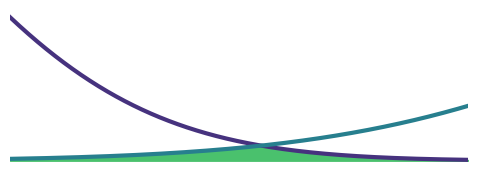

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import seaborn as sns


# Generate data points

fig, axs = plt.subplots(1, 1, figsize=(5, 2))
x = np.linspace(-8, 8, 1000)

plt.xlim(-8, 8)
# Parameters for the two Gaussian distributions

mean1, std1 = -2, 0.8  # Mean and standard deviation for the first Gaussian
mean2, std2 = 3, 1.2  # Mean and standard deviation for the second Gaussian

#create a small gaussian to sum as noise


# Gaussian distributions
bd = 0.1
y1 = norm.pdf(x*bd, mean1, std1)
y2 = norm.pdf(x*bd, mean2, std2)  #+ norm.pdf(x, mean2*0, std2*0.3)*0.2


#define color 1 and color 2, light blue and lighter blue
color1 =  sns.color_palette("viridis")[0] #Set2
color2 =  sns.color_palette("viridis")[2]
color3 =  sns.color_palette("viridis")[4]
# Plot the two Gaussians
plt.plot(x, y1, label=r'$|\phi(x_1)\rangle$', color=color1)
plt.plot(x, y2, label=r'$|\phi(x_2)\rangle$', color=color2)

# Find the minimum of the two Gaussians to highlight the overlap
y_overlap = np.minimum(y1, y2)

# Fill the overlapping region
plt.fill_between(x, y_overlap, color=color3, alpha=1, label=r"$k(x_1, x_2) = \langle \phi(x_1), \phi(x_2) \rangle_{\mathcal{H}}$")

# Additional plot details
plt.xlabel('X-axis')
plt.ylabel('Probability Density')
#legend more to the right
plt.axis('off')

#legend to the right of the plot, color white, font color white
plt.legend(loc='center left', bbox_to_anchor=(0.70, 0.55), frameon=False, fontsize=18, facecolor='black', edgecolor='white', labelcolor='black')
#manually modify the legend symbols
plt.gca().get_legend().legend_handles[0].set_color("white")
plt.gca().get_legend().legend_handles[1].set_color("white")
plt.gca().get_legend().legend_handles[2].set_color("white")
#change zorder 
plt.gca().get_legend().set_zorder(00)

#remove legend
plt.legend().remove()




#plot now for 
#plt.savefig("two_gaussians_far_with_c.svg", bbox_inches='tight', dpi=400)
plt.tight_layout()

plt.show()
